# Time Series Plots

In [1]:
#import paskages
import numpy as np
import matplotlib.pyplot as plt

#### Plot Utilities

In [12]:
def plot_series(time , series , format='-' , start=0 , end=None , label=None):

    
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """
    
    plt.figure(figsize=(10,6))
    
    plt.plot(time[start:end] ,   series[start:end] , format)
    
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    if label:
        plt.legend(labels= label , fontsize=14)
    
    plt.grid(True)
    
    plt.show()

#### Trend

Generates synthetic data that follows a straight line given a slope value.

In [14]:
def trend(time , slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """
    
    #compute linear series given slope
    series = slope* time
    
    return series


In [21]:
trend(np.array([10,11,12,13,14]),[0.25])

array([2.5 , 2.75, 3.  , 3.25, 3.5 ])

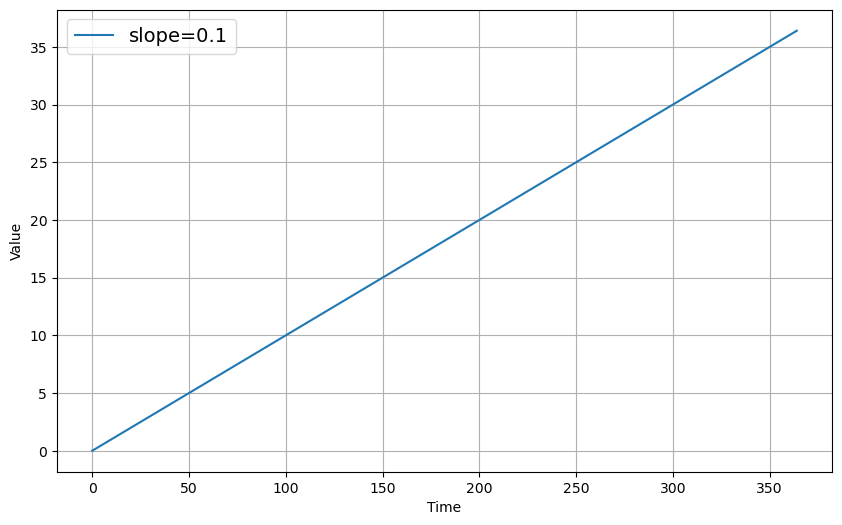

In [27]:
# Generate time steps
time = np.arange(365)
slope=0.1

series = trend(time , slope)

plot_series(time , series , label=[f'slope={slope}'])

#### Seasonality